In [21]:
# I want the prior to be DEFINED to be uniform in q, phi
# then a logL term as before


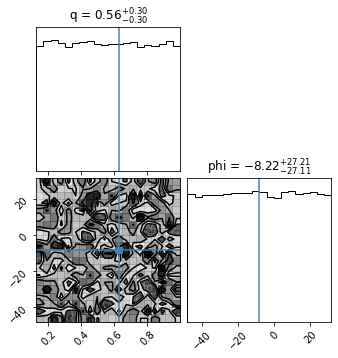

/home/jackquei/Desktop/UNI_Muenchen/Thesis/lenstronomy/SDSSJ1433/general_program/Data/conversion.py:207: UserWarning: NOTE: assumed phi given in degree!
  warnings.warn("NOTE: assumed phi given in degree!")


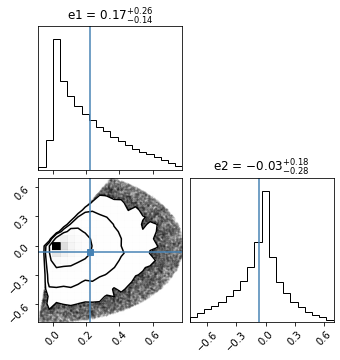

In [3]:
import numpy as np
from Data.conversion import qphi_from_e1e2,e1e2_from_qphi
import numpy as np
import matplotlib.pyplot as plt
from corner import corner
from settings_CPRP.same_prior_RPI_PLL_corr import *

lens_prior.pll
q0,phi0 = lens_prior.pll["q"][0],lens_prior.pll["phi"][0]
nsample = 100000
q_prior = np.random.uniform(max([q0-.5,0]),min([q0+.5,.999]),nsample)
phi_prior = np.random.uniform(phi0-40,phi0+40,nsample)
corner(np.transpose([q_prior,phi_prior]),truths=[q0,phi0],titles=["q","phi"],show_titles=True)
plt.show()
e1_prior, e2_prior = e1e2_from_qphi(q_prior,phi_prior)
e10,e20 = e1e2_from_qphi(q0,phi0)
corner(np.transpose([e1_prior,e2_prior]),truths=[e10,e20],titles=["e1","e2"],show_titles=True)
plt.show()

In [4]:
import astropy

In [5]:
from astropy.cosmology import default_cosmology
import astropy.constants as csnt
import astropy.units as unit
import numpy as np

In [25]:
z_lens = 0.1841
z_source = 2.366

theta = 2.015*unit.arcsec.to("rad")


def sigma(theta,z_lens,z_source,cosmo=None):
    if cosmo is None:
        cosmo = default_cosmology.get()
    #cosmo_dd  = cosmo.angular_diameter_distance(z_lens)
    cosmo_ds  = cosmo.angular_diameter_distance(z_source)
    cosmo_dds = cosmo.angular_diameter_distance_z1z2(z1=z_lens,z2=z_source)
    return csnt.c.to("km/s")*np.sqrt(theta*cosmo_ds/(4*np.pi*cosmo_dds))


sigma(theta,z_lens=z_lens,z_source=z_source)

<Quantity 284.09612948 km / s>

In [26]:
z_lens = 0.407
z_source = 2.737

theta = 1.6*unit.arcsec.to("rad")
sigma(theta,z_lens=z_lens,z_source=z_source)

<Quantity 273.93013748 km / s>

In [27]:
L_475 = 14825657022.945004*csnt.L_sun

def sigma_FJr(L_V):
    return (200*unit.km/unit.s)*((L_V/(csnt.L_sun*2*10**10))**(1/4))

sigma_FJr(L_475)

<Quantity 185.57778379 km / s>

---
- try pll prior correction


In [6]:
from Data.conversion import qphi_from_e1e2,e1e2_from_qphi
import numpy as np
import matplotlib.pyplot as plt
from corner import corner

In [7]:
from settings_CPRP.same_prior_RPI_PLL_corr import *


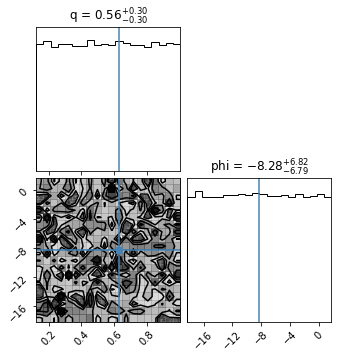

In [30]:

lens_prior.pll
q0,phi0 = lens_prior.pll["q"][0],lens_prior.pll["phi"][0]
nsample = 100000
q_prior = np.random.uniform(np.max([q0-.5,0]),np.min([1,q0+.5]),nsample)
phi_prior = np.random.uniform(phi0-10,phi0+10,nsample)
corner(np.transpose([q_prior,phi_prior]),truths=[q0,phi0],titles=["q","phi"],show_titles=True)
plt.show()

In [31]:
e1_prior, e2_prior = e1e2_from_qphi(q_prior,phi_prior,deg=True)
e10,e20 = e1e2_from_qphi(q0,phi0)


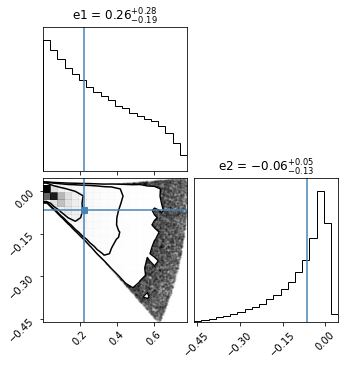

In [32]:
corner(np.transpose([e1_prior,e2_prior]),truths=[e10,e20],titles=["e1","e2"],show_titles=True)
plt.show()

In [33]:
from astropy import units as u
def qphi_from_e1e2(e1, e2,ret_deg=False):
    """
    transforms complex ellipticity moduli in orientation angle and axis ratio

    :param e1: eccentricity in x-direction
    :param e2: eccentricity in xy-direction
    :return: angle in radian, axis ratio (minor/major)
    """
    phi = np.arctan2(e2, e1)/2
    c = np.sqrt(e1**2+e2**2)
    c = np.minimum(c, 0.9999)
    q = (1-c)/(1+c)
    if ret_deg:
        return q,phi*u.rad.to("deg")
    else:
        return q,phi    
"""q,phi  = qphi_from_e1e2(e1_prior,e2_prior,ret_deg=True)
index = np.where((phi>np.max(phi_prior)) | (phi<np.min(phi_prior)))
inv_index = np.where((phi<np.max(phi_prior)) & (phi>np.min(phi_prior)))
corner(np.array([q_prior[index],phi_prior[index]]).T)
plt.show()
corner(np.array([e1_prior[index],e2_prior[index]]).T,titles=["e1","e2"],show_titles=True)
plt.show()
corner(np.array([e1_prior[inv_index],e2_prior[inv_index]]).T,titles=["e1","e2"],show_titles=True)
plt.show()
d,b,_ = plt.hist(e1_prior[index],alpha=.5,density=True)
plt.hist(e1_prior[inv_index],bins=b,alpha=.5,density=True)
plt.show()
d,b,_ = plt.hist(e2_prior[index],alpha=.5,density=True)
plt.hist(e2_prior[inv_index],bins=b,alpha=.5,density=True)
plt.show() 
plt.hist2d(e1_prior[index],e2_prior[index],alpha=.5,density=True,cmap="viridis")
plt.hist2d(e1_prior[inv_index],e2_prior[inv_index],alpha=.5,density=True,cmap="Greens")
plt.show()
d,b,_ = plt.hist(e1_prior[index]/e2_prior[index],alpha=.5,density=True)
plt.hist(e1_prior[inv_index]/e2_prior[inv_index],bins=b,alpha=.5,density=True)
plt.show()
d,b,_ = plt.hist(np.arctan2(e2_prior[index],e1_prior[index])*.5*u.rad.to("deg"),alpha=.5,density=True)
plt.hist(np.arctan2(e2_prior[inv_index],e1_prior[inv_index]),bins=b,alpha=.5,density=True)
plt.show()
d,b,_ = plt.hist(e2_prior[index],alpha=.5,density=True)
plt.hist(e2_prior[inv_index],bins=b,alpha=.5,density=True)
"""

'q,phi  = qphi_from_e1e2(e1_prior,e2_prior,ret_deg=True)\nindex = np.where((phi>np.max(phi_prior)) | (phi<np.min(phi_prior)))\ninv_index = np.where((phi<np.max(phi_prior)) & (phi>np.min(phi_prior)))\ncorner(np.array([q_prior[index],phi_prior[index]]).T)\nplt.show()\ncorner(np.array([e1_prior[index],e2_prior[index]]).T,titles=["e1","e2"],show_titles=True)\nplt.show()\ncorner(np.array([e1_prior[inv_index],e2_prior[inv_index]]).T,titles=["e1","e2"],show_titles=True)\nplt.show()\nd,b,_ = plt.hist(e1_prior[index],alpha=.5,density=True)\nplt.hist(e1_prior[inv_index],bins=b,alpha=.5,density=True)\nplt.show()\nd,b,_ = plt.hist(e2_prior[index],alpha=.5,density=True)\nplt.hist(e2_prior[inv_index],bins=b,alpha=.5,density=True)\nplt.show() \nplt.hist2d(e1_prior[index],e2_prior[index],alpha=.5,density=True,cmap="viridis")\nplt.hist2d(e1_prior[inv_index],e2_prior[inv_index],alpha=.5,density=True,cmap="Greens")\nplt.show()\nd,b,_ = plt.hist(e1_prior[index]/e2_prior[index],alpha=.5,density=True)\nplt.

In [34]:
"""e1t,e2t = e1e2_from_qphi(q_prior[index],phi_prior[index],deg=True)
e1tt,e2tt = e1e2_from_qphi(q_prior,phi_prior,deg=True)
corner(np.array([e1t,e2t]).T)
plt.show()
corner(np.array([e1tt[index],e2tt[index]]).T)
plt.show()
"""

'e1t,e2t = e1e2_from_qphi(q_prior[index],phi_prior[index],deg=True)\ne1tt,e2tt = e1e2_from_qphi(q_prior,phi_prior,deg=True)\ncorner(np.array([e1t,e2t]).T)\nplt.show()\ncorner(np.array([e1tt[index],e2tt[index]]).T)\nplt.show()\n'

In [35]:
"""e1t,e2t = e1e2_from_qphi(q_prior[index],phi_prior[index],deg=True)
corner(np.array([e1t,e2t]).T)
plt.show()
qt,phit = qphi_from_e1e2(e1t,e2t,ret_deg=True)
corner(np.array([qt,phit]).T)
plt.show()"""

'e1t,e2t = e1e2_from_qphi(q_prior[index],phi_prior[index],deg=True)\ncorner(np.array([e1t,e2t]).T)\nplt.show()\nqt,phit = qphi_from_e1e2(e1t,e2t,ret_deg=True)\ncorner(np.array([qt,phit]).T)\nplt.show()'

The reason why the region where e1>~0 and e2<~0 corresponds to the +-pi/2 pointing angle is due to the definition of arctan2(e2,e1):

https://numpy.org/doc/stable/reference/generated/numpy.arctan2.html
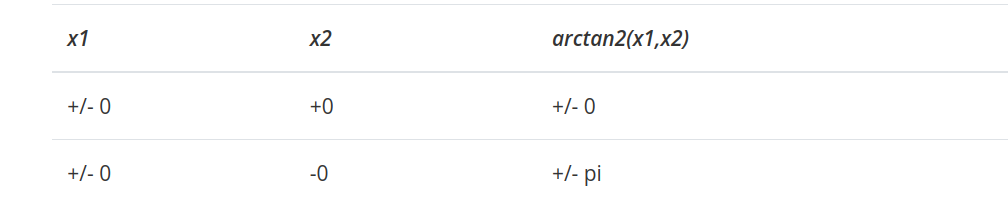

- why is it so, how to avoid it?
    - why is there a factor 1/2 that "ruins" the continuity of phi? Bc a change of +-pi would not matter, but a change of pi/2 does
    - if we change the definition of pointing angle (ie the position of the 0 of it) we might avoid the problem altogheter given reasonable ranges?
- does it affect our modelling at the moment?
- 

In [36]:
#q_t,phi_t=.9, -1e-8
"""q_t,phi_t = q_prior[index][0],phi_prior[index][0]
e1t,e2t = e1e2_from_qphi(q_t,phi_t)
print(e1t,e2t)
print(qphi_from_e1e2(e1t,e2t,ret_deg=True),q_t,phi_t)"""

'q_t,phi_t = q_prior[index][0],phi_prior[index][0]\ne1t,e2t = e1e2_from_qphi(q_t,phi_t)\nprint(e1t,e2t)\nprint(qphi_from_e1e2(e1t,e2t,ret_deg=True),q_t,phi_t)'

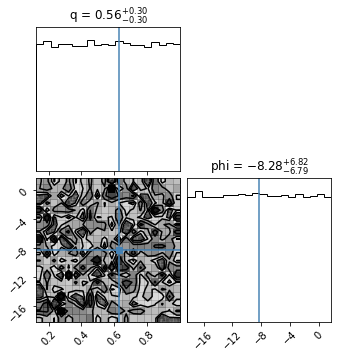

In [37]:
corner(np.transpose(qphi_from_e1e2(e1_prior,e2_prior,ret_deg=True)),truths=[q0,phi0],titles=["q","phi"],show_titles=True)
plt.show()

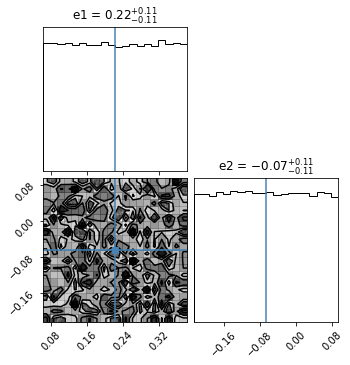

In [38]:
de12 =  2*0.08
e1_prior2 = np.random.uniform(e10-de12,e10+de12,nsample)
e2_prior2 = np.random.uniform(e20-de12,e20+de12,nsample)
corner(np.transpose([e1_prior2,e2_prior2]),truths=[e10,e20],titles=["e1","e2"],show_titles=True)
plt.show()

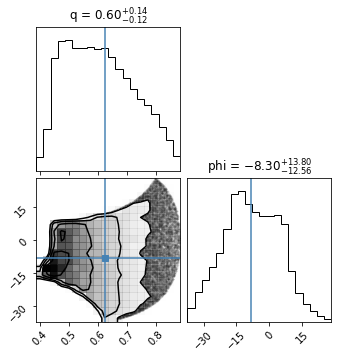

In [39]:
q_prior2,phi_prior2 = qphi_from_e1e2(e1_prior2,e2_prior2,ret_deg=True)
corner(np.transpose([q_prior2,phi_prior2]),truths=[q0,phi0],titles=["q","phi"],show_titles=True)
plt.show()

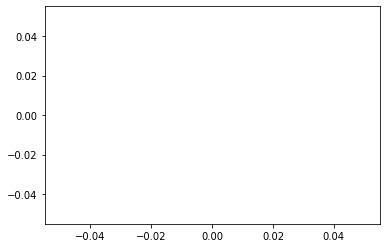

In [40]:
import numpy as np
import os
dir = "/."
files= []
for file in os.listdir(dir):
    if file.endswith("newzp.txt"):
        files.append(os.path.join(dir, file))

date = []
ZP_stars = []
ZP_mean = []
sig_stars = []
sig_mean = []
for f in files:
    with open(f,"r") as file:
        d=file.readlines()
    D,ZP0,ZP1,ZPmean,Sig0,Sig1,Sigmean = d[0].split(" ")
    date.append(float(D))
    ZP_stars.append([float(ZP0),float(ZP1)])
    ZP_mean.append(float(ZPmean))
    sig_stars.append([float(Sig0),float(Sig1)])
    sig_mean.append(float(Sigmean))
"""ZP_stars = np.transpose(ZP_stars) #date,stars
sig_stars = np.transpose(sig_stars) #date,stars
"""
ZP_stars = np.array(ZP_stars)
sig_stars = np.array(sig_stars)
ZP_mean = np.array(ZP_mean)
sig_mean = np.array(sig_mean)

import matplotlib.pyplot as plt

lbls = ["star1","star2"]
cls = ["b","r"]

for i,(ZP,sg) in enumerate(zip(ZP_stars,sig_stars)):
    plt.errorbar(date,ZP-ZP_mean,yerr=np.sqrt(sig_stars**2+sig_mean**2))
    plt.scatter(date,ZP-ZP_mean,label=lbls[i],c=cls[i])
plt.errorbar(date,np.zeros_like(ZP_mean),yerr=sig_mean)
plt.scatter(date,np.zeros_like(ZP_mean),label="0",c="k")


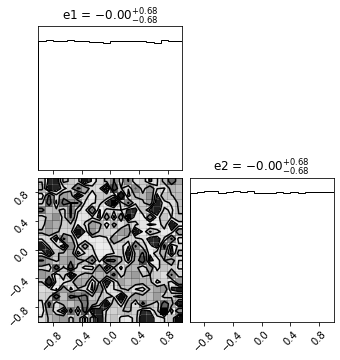

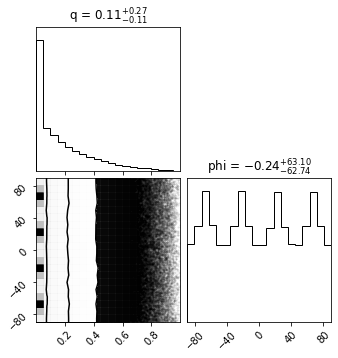

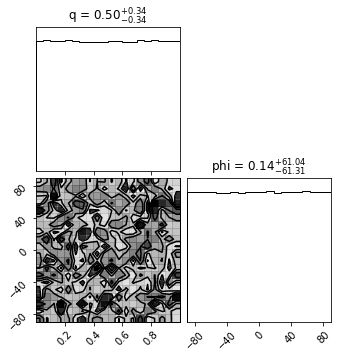

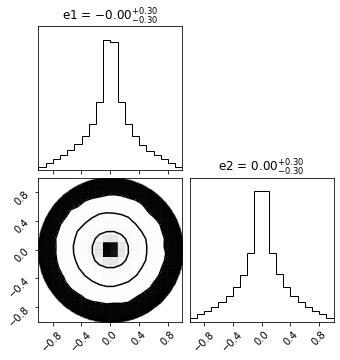

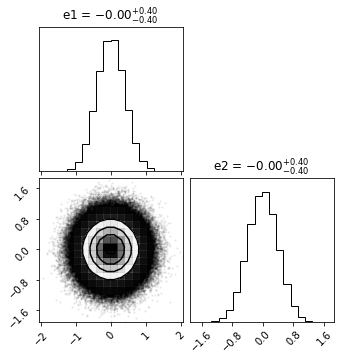

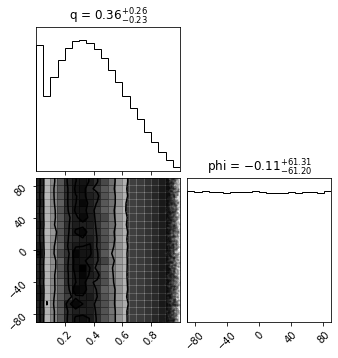

In [41]:
e1_test =np.random.uniform(-1,1,int(1e6))
e2_test =np.random.uniform(-1,1,int(1e6))
corner(np.array([e1_test,e2_test]).T,titles=["e1","e2"],show_titles=True)
plt.show()
q,phi = qphi_from_e1e2(e1_test,e2_test,ret_deg=True)
corner(np.array([q,phi]).T,titles=["q","phi"],show_titles=True)
plt.show()

q_test =np.random.uniform(1e-10,1,int(1e6))
phi_test =np.random.uniform(-90,+90,int(1e6))
corner(np.array([q_test,phi_test]).T,titles=["q","phi"],show_titles=True)
plt.show()
e1_test,e2_test = e1e2_from_qphi(q_test,phi_test,deg=True)
corner(np.array([e1_test,e2_test]).T,titles=["e1","e2"],show_titles=True)
plt.show()


e1_test =np.random.normal(0,.4,int(1e6))
e2_test =np.random.normal(0,.4,int(1e6))
corner(np.array([e1_test,e2_test]).T,titles=["e1","e2"],show_titles=True)
plt.show()
q,phi = qphi_from_e1e2(e1_test,e2_test,ret_deg=True)
corner(np.array([q,phi]).T,titles=["q","phi"],show_titles=True)
plt.show()


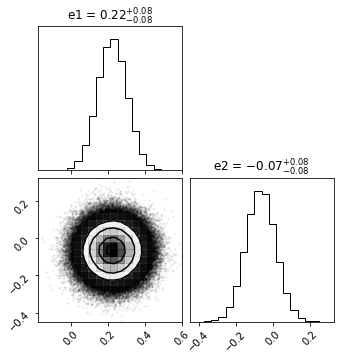

KeyboardInterrupt: 

In [42]:
lens_prior.pll
q0,phi0 = lens_prior.pll["q"][0],lens_prior.pll["phi"][0]
e10,e20 = e1e2_from_qphi(q0,phi0)
def cut_e(e1,e2):
    ind = np.where((np.abs(e1)<1) & (np.abs(e2)<1))
    return e1[ind],e2[ind]
sig_e = .08
e1_test =np.random.normal(e10,sig_e,int(5e5))
e2_test =np.random.normal(e20,sig_e,int(5e5))
e1_test,e2_test = cut_e(e1_test,e2_test)
"""
e1_test =np.random.uniform(-1,1,int(1e6))
e2_test =np.random.uniform(-1,1,int(1e6))
"""
corner(np.array([e1_test,e2_test]).T,titles=["e1","e2"],show_titles=True)
plt.show()
q,phi = qphi_from_e1e2(e1_test,e2_test,ret_deg=True)
q_norm   = np.random.normal(q0,.1,int(5e5))
phi_norm = np.random.normal(phi0,10,int(5e5))
def cut_qphi(q,phi):
    ind = np.where((q>0 ) & (q<1))
    return q[ind],phi[ind]
q_norm,phi_norm = cut_qphi(q_norm,phi_norm)
fg, ax = plt.subplots(2,2,figsize=(8,8))                
corner(np.array([q_norm,phi_norm]).T,titles=["q","phi"],show_titles=True,hist_kwargs= {"density":True},fig=fg,color="blue")
corner(np.array([q,phi]).T,titles=["q","phi"],show_titles=True,hist_kwargs= {"density":True},fig=fg,color="red")
plt.show()

In [ ]:
q0#


0.6250645725046406

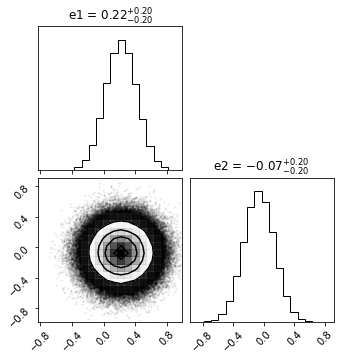

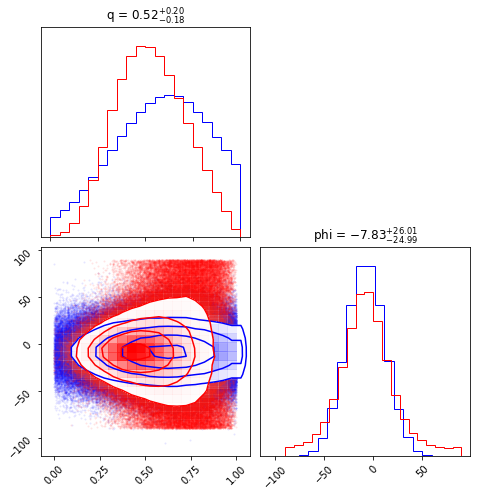

In [ ]:
lens_prior.pll
q0,phi0 = lens_prior.pll["q"][0],lens_prior.pll["phi"][0]
e10,e20 = e1e2_from_qphi(q0,phi0)
def cut_e(e1,e2):
    ind = np.where((np.abs(e1)<1) & (np.abs(e2)<1))
    return e1[ind],e2[ind]
sig_e = .2
e1_test =np.random.normal(e10,sig_e,int(5e5))
e2_test =np.random.normal(e20,sig_e,int(5e5))
e1_test,e2_test = cut_e(e1_test,e2_test)
"""
e1_test =np.random.uniform(-1,1,int(1e6))
e2_test =np.random.uniform(-1,1,int(1e6))
"""
corner(np.array([e1_test,e2_test]).T,titles=["e1","e2"],show_titles=True)
plt.show()
q,phi = qphi_from_e1e2(e1_test,e2_test,ret_deg=True)
q_norm   = np.random.normal(q0,.3,int(5e5))
phi_norm = np.random.normal(phi0,20,int(5e5))
def cut_qphi(q,phi):
    ind = np.where((q>0 ) & (q<1))
    q,phi = q[ind],phi[ind]
    ind = np.where((phi>-180 ) & (phi<180))
    q,phi = q[ind],phi[ind]
    return q,phi 
q_norm,phi_norm = cut_qphi(q_norm,phi_norm)
fg, ax = plt.subplots(2,2,figsize=(8,8))                
corner(np.array([q_norm,phi_norm]).T,titles=["q","phi"],show_titles=True,hist_kwargs= {"density":True},fig=fg,color="blue")
corner(np.array([q,phi]).T,titles=["q","phi"],show_titles=True,hist_kwargs= {"density":True},fig=fg,color="red")
plt.show()

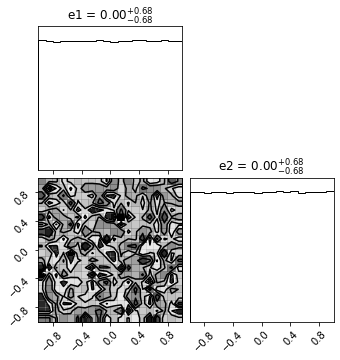

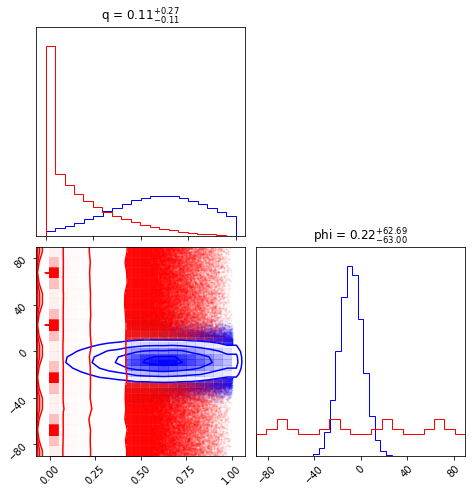

In [ ]:
lens_prior.pll
q0,phi0 = lens_prior.pll["q"][0],lens_prior.pll["phi"][0]
e10,e20 = e1e2_from_qphi(q0,phi0)
def cut_e(e1,e2):
    ind = np.where((np.abs(e1)<1) & (np.abs(e2)<1))
    return e1[ind],e2[ind]
"""

sig_e = .08
e1_test =np.random.normal(e10,sig_e,int(5e5))
e2_test =np.random.normal(e20,sig_e,int(5e5))
e1_test,e2_test = cut_e(e1_test,e2_test)
"""
e1_test =np.random.uniform(-1,1,int(1e6))
e2_test =np.random.uniform(-1,1,int(1e6))
corner(np.array([e1_test,e2_test]).T,titles=["e1","e2"],show_titles=True)
plt.show()
q,phi = qphi_from_e1e2(e1_test,e2_test,ret_deg=True)
q_norm   = np.random.normal(q0,.3,int(5e5))
phi_norm = np.random.normal(phi0,10,int(5e5))
def cut_qphi(q,phi):
    ind = np.where((q>0 ) & (q<1))
    return q[ind],phi[ind]
q_norm,phi_norm = cut_qphi(q_norm,phi_norm)
fg, ax = plt.subplots(2,2,figsize=(8,8))                
corner(np.array([q_norm,phi_norm]).T,titles=["q","phi"],show_titles=True,hist_kwargs= {"density":True},fig=fg,color="blue")
corner(np.array([q,phi]).T,titles=["q","phi"],show_titles=True,hist_kwargs= {"density":True},fig=fg,color="red")
plt.show()

/home/jackquei/Desktop/UNI_Muenchen/Thesis/lenstronomy/SDSSJ1433/general_program/Data/conversion.py:207: UserWarning: NOTE: assumed phi given in degree!
  warnings.warn("NOTE: assumed phi given in degree!")


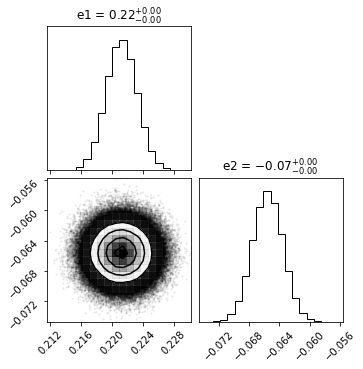

/home/jackquei/Desktop/UNI_Muenchen/Thesis/lenstronomy/SDSSJ1433/general_program/Data/conversion.py:230: UserWarning: NOTE: phi is returned in degrees!
  warnings.warn("NOTE: phi is returned in degrees!")


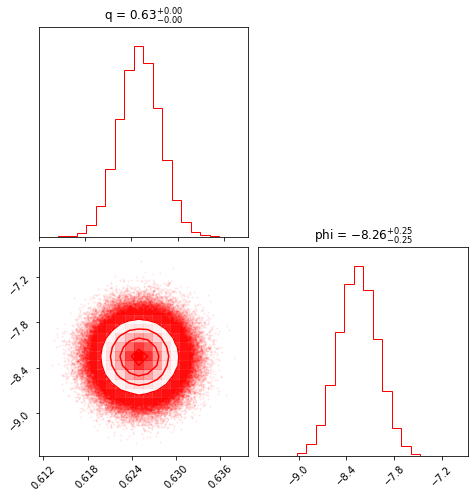

In [12]:
lens_prior.pll
q0,phi0 = lens_prior.pll["q"][0],lens_prior.pll["phi"][0]
e10,e20 = e1e2_from_qphi(q0,phi0)
def cut_e(e1,e2):
    ind = np.where((np.abs(e1)<1) & (np.abs(e2)<1))
    return e1[ind],e2[ind] 
sig_e = .002
e1_test =np.random.normal(e10,sig_e,int(5e5))
e2_test =np.random.normal(e20,sig_e,int(5e5))
e1_test,e2_test = cut_e(e1_test,e2_test) 
corner(np.array([e1_test,e2_test]).T,titles=["e1","e2"],show_titles=True)
plt.show()
q,phi = qphi_from_e1e2(e1_test,e2_test,ret_deg=True)
q_norm   = np.random.normal(q0,.3,int(5e5))
phi_norm = np.random.normal(phi0,10,int(5e5))
def cut_qphi(q,phi):
    ind = np.where((q>0 ) & (q<1))
    return q[ind],phi[ind]
q_norm,phi_norm = cut_qphi(q_norm,phi_norm)
fg, ax = plt.subplots(2,2,figsize=(8,8))                
#corner(np.array([q_norm,phi_norm]).T,titles=["q","phi"],show_titles=True,hist_kwargs= {"density":True},fig=fg,color="blue")
corner(np.array([q,phi]).T,titles=["q","phi"],show_titles=True,hist_kwargs= {"density":True},fig=fg,color="red")
plt.show()

In [13]:

e1_test.shape

(500000,)

In [14]:
"""from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

# find the best bandwidth for each filter
prior_bndws = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),{'bandwidth': prior_bndws})
# initial shape of samples: filter,dimension,step
Prior = np.array([e1_test,e2_test]).T
bandwidth = grid.fit(Prior)
#bandwidth_LR = grid.fit(Prior_LR)
# input of grid.fit must have shape: ( n*steps, n*dimensions)

# define the KDE
kde = KernelDensity(**bandwidth.best_params_, kernel='gaussian') 
kde.fit(Prior)"""

"""
#kde_LR = KernelDensity(**bandwidth_LR.best_params_, kernel='gaussian') 
# Fit the KDE to the samples
e1_pos =np.random.uniform(-.1,.45,10)
e2_pos =np.random.uniform(-.45,.35,10)

positions =np.transpose( [e1_pos,e2_pos])
kde.fit(positions)"""

"\n#kde_LR = KernelDensity(**bandwidth_LR.best_params_, kernel='gaussian') \n# Fit the KDE to the samples\ne1_pos =np.random.uniform(-.1,.45,10)\ne2_pos =np.random.uniform(-.45,.35,10)\n\npositions =np.transpose( [e1_pos,e2_pos])\nkde.fit(positions)"

In [15]:
positions,kde.score_samples(positions)

class mykde():
    def __init__(self,KDE):
        self.kde=KDE
    def likelihood(self,pos):
        return self.kde.score_samples(pos).tolist()
lol_kde = mykde(kde)
lol_kde.likelihood([positions[0]])

NameError: name 'positions' is not defined

In [16]:
import pickle

with open("del.pkl","wb") as f:
    pickle.dump(kde,f)

NameError: name 'kde' is not defined

In [17]:
with open("del.pkl","rb") as f:
    kde2 = pickle.load(f)

EOFError: Ran out of input

In [18]:
import pickle
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV


class mykde():
    def __init__(self,KDE):
        self.kde=KDE
    def likelihood(self,pos):
        return self.kde.score_samples(pos).tolist()
    
n_kde_points= int(1e3)
min_q,max_q = 0.4,0.95
min_phi,max_phi =-40,+30#degrees
 

q_prior =np.random.uniform(min_q,max_q,n_kde_points)
phi_prior =np.random.uniform(min_phi,max_phi,n_kde_points)

e1_prior,e2_prior = e1e2_from_qphi(q_test,phi_test,deg=True)
corner(np.array([e1_test,e2_test]).T,titles=["e1","e2"],show_titles=True)
#plt.savefig("Prior_e1e2.pdf")
# find the best bandwidth for each filter
#prior_bndws = 10 ** np.linspace(-1, 1, 100)
#grid = GridSearchCV(KernelDensity(kernel='gaussian'),{'bandwidth': prior_bndws})
# initial shape of samples: filter,dimension,step
Prior = np.array([e1_test,e2_test]).T
#bandwidth = grid.fit(Prior)
#bandwidth_LR = grid.fit(Prior_LR)
# input of grid.fit must have shape: ( n*steps, n*dimensions)

# define the KDE

#kde = KernelDensity(**bandwidth.best_params_, kernel='gaussian') 
kde = KernelDensity(bandwidth=1, kernel='gaussian').fit(Prior)
prior_KDE = mykde(kde)

with open("prior_kde.pkl","wb") as f:
    pickle.dump(prior_KDE,f)

NameError: name 'q_test' is not defined

In [19]:
with open("prior_kde.pkl","rb") as f:
    prior_ = pickle.load(f)

prior_.likelihood([Prior[0]])

NameError: name 'Prior' is not defined

In [20]:
########################################################################################################################################
########################################################################################################################################
########################################################################################################################################
########################################################################################################################################
########################################################################################################################################
########################################################################################################################################
########################################################################################################################################
########################################################################################################################################

The function is defined as
\begin{equation}  
f(q)   = 
\begin{cases}
 1*A & \text{if } q>q_0  \\
 A*e^{\frac{-[q- q_0 ]^2}{2 \sigma_q^2}} &  \text{else}
\end{cases}
\end{equation} 
Where A is the normalisation constant. The integral has to be 1, so:
\begin{equation}
\int dq f(q) = A*\int_0^{q_0} e^{\frac{-[q- q_0 ]^2}{2 \sigma_q^2}}dq + A*\int_{q_0}^1 dx =1
\end{equation}

\begin{equation}
=A*\int_0^{q_0} e^{\frac{-[q- q_0 ]^2}{2 \sigma_q^2}}dq + A*(1-q_0) =1
\end{equation}

the first integral can be substituted to be $x = q-q_0$ and $b=1/2\sigma_q^2$, so that $dx=dq$ , $q=0 \rightarrow x=-q_0$ and $q=q_0 \rightarrow x=0$
thus for the first integral we have:

\begin {equation}
\int_{-q_0}^0 dx e^{b*x^2}=\frac{\sqrt{\pi} erf(\sqrt{bx^2})}{2\sqrt{b}} |^0_{-q_0} = 0 - \frac{\sqrt{\pi} erf(-q_0\sqrt{1/(2\sigma^2)})}{2\sqrt{1/(2\sigma^2)}} 
\end {equation}


\begin{equation}
=\frac{\sigma \sqrt{\pi} erf(q_0/(\sqrt{2}\sigma) )}{\sqrt{2}} 
\end{equation}



Thus 
\begin{equation}
A*\frac{\sigma \sqrt{\pi} erf(q_0/(\sqrt{2}\sigma) )}{\sqrt{2}}  + A*(1-q_0) =1
\end{equation}

\begin{equation}
A = \frac{1}{1-q_0+\sigma \sqrt{\pi/2}\, \text{erf}(q_0/(\sqrt{2}\sigma) )}
\end{equation}


In [21]:
import math
def get_norm_A(q0,sigma):
    # almost same as norm = (np.sqrt(2*np.pi)*sig)/2.+(1-xm)
    _erf = math.erf(q0/(sigma * np.sqrt(2)))
    frc = sigma * np.sqrt(np.pi/2)*_erf
    return 1/(1-q0+frc)

def get_norm_left(q0,sigma):
    _erf = math.erf(q0/(sigma * np.sqrt(2)))
    frc = sigma * np.sqrt(np.pi/2)*_erf
    return frc
def get_norm_right(q0,sigma=None):
    return (1-q0)



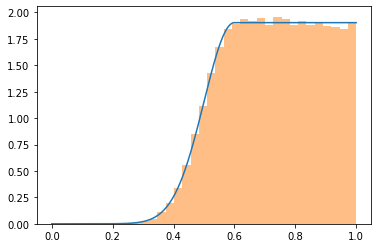

In [22]:

qlight=0.6
xm=qlight
sig=0.1
#norm = (np.sqrt(2*np.pi)*sig)/2.+(1-xm)
norm = 1/get_norm_A(xm,sig)
x=np.linspace(0,1,1001)
y = np.exp(-(xm-x)**2/(2*sig**2))/norm
y[(x>xm)] = 1/norm
#print(np.trapz(y, x)-1)


plt.plot(x,y)
#plt.show()
numsample = int(10e4)
q_left  = np.random.normal(xm,sig*1,int(numsample))
q_right = np.random.uniform(xm,1,int(numsample))
q_left  = np.random.choice(q_left[q_left<xm],int(numsample*get_norm_left(xm,sig)))
q_right = np.random.choice(q_right[q_right>xm],int(numsample*get_norm_right(xm))) 

#q_left = np.random.choice(q_left[q_left<=xm],int(nsample/2))
#q_right =  np.random.choice(q_right[q_right>=xm],int(nsample/2))
q_smpl = np.append(q_left,q_right)

plt.hist(q_smpl,bins=30,alpha=.5,density=1)
plt.show()
#plt.hist(q_left,alpha=.5)
#plt.hist(q_right,alpha=.5)

In [23]:
def semigaussian_fnct(q,q0,sig):
    norm = get_norm_A(q0,sigma=sig)
    f = np.exp(-(q-q0)**2/(2*sig**2))/norm
    f[(q>q0)] = 1/norm
    return f

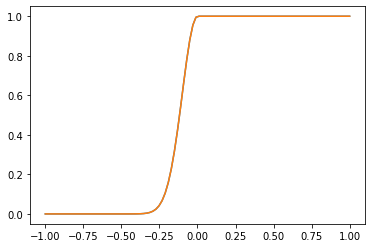

In [24]:
def semigauss(x,x0,sig):
    if x<x0:
        return np.exp(-(x-x0)**2/(2*sig**2))
    else:
        return 1
def semigauss_arr(x,x0,sig):
    smg_arr = []
    for xi in x:
        smg_arr.append(semigauss(xi,x0,sig))
    return np.array(smg_arr)
def semigaussian_fnct(q,q0,sig):
    norm = get_norm_A(q0,sigma=sig)
    f = np.exp(-(q-q0)**2/(2*sig**2))/norm
    f[(q>q0)] = 1/norm
    return f

x = np.linspace(-1,1,100)
x0 = 0
sig=.1
plt.plot(x,semigaussian_fnct(x,x0,sig)*get_norm_A(x0,sig))
plt.plot(x,semigauss_arr(x,x0,sig))


In [25]:
def Read_SLACS(file_name):
    with open(file_name, 'r') as data:
        q_mass  = []
        q_light = []
        Dphi    = []
        for line in data:
            if "#" not in line:
                p = line.split()
                q_light.append(float(p[0]))
                q_mass.append(float(p[1]))
                Dphi.append(float(p[2]))

    return np.array(q_light),np.array(q_mass),np.array(Dphi)

ql,qm,dphi = Read_SLACS('data/SLACS_qphi.tab')

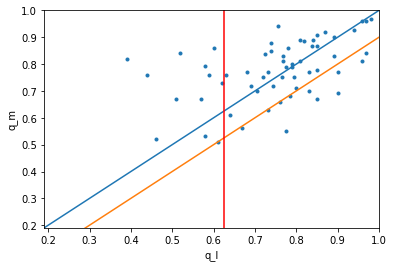

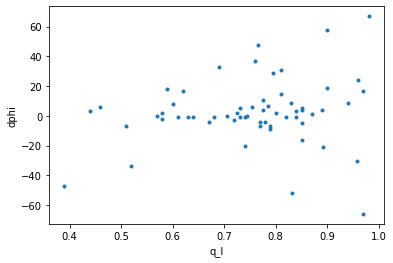

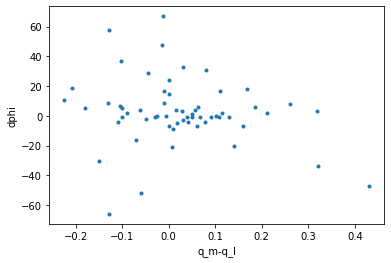

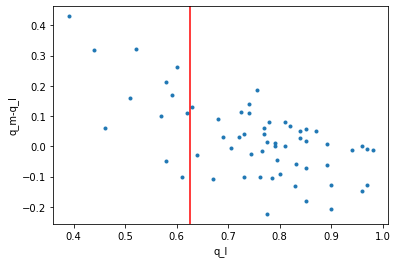

In [26]:
q_ll = lens_PEMD_prior.pll["q"][0]

plt.scatter(ql,qm,marker=".")
plt.xlim(min(ql)-.2,1)
plt.ylim(min(ql)-.2,1)
plt.plot([0,1],[0,1])
plt.plot([+0.1,1.1],[0,1])
plt.xlabel("q_l")
plt.ylabel("q_m")
plt.axvline(q_ll,c="r",label="q_ll")
plt.show()

plt.scatter(ql,dphi,marker=".")
plt.xlabel("q_l")
plt.ylabel("dphi")
plt.show()

plt.scatter(qm-ql,dphi,marker=".")
plt.xlabel("q_m-q_l")
plt.ylabel("dphi")
plt.show()

plt.scatter(ql,qm-ql,marker=".")
plt.ylabel("q_m-q_l")
plt.xlabel("q_l")
plt.axvline(q_ll,c="r",label="q_ll")

plt.show()

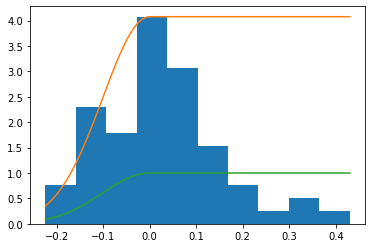

In [27]:
from corner import quantile

fig,ax = plt.subplots()
dq = qm-ql
x_dq = np.linspace(min(dq),max(dq),1000)
dns,_,_ = ax.hist([dq],density=1)
qnt = quantile(dq,q=[0.16])
def semigauss(x,x0,sig):
    if x<x0:
        return np.exp(-(x-x0)**2/(2*sig**2))
    else:
        return 1
def semigauss_arr(x,x0,sig):
    smg_arr = []
    for xi in x:
        smg_arr.append(semigauss(xi,x0,sig))
    return np.array(smg_arr)
sig_min  = np.abs(qnt[0])
plt.plot(x_dq,max(dns)*semigauss_arr(x_dq,0,sig_min) )

ax.plot(x_dq,semigaussian_fnct(x_dq,q0=0,sig=sig_min))
#ax.axvline(0,c="k")


In [28]:
print("The resulting sigma_min = ",sig_min)

The resulting sigma_min =  0.10111999999999997


Now we have to sample q given this sigma

In [223]:
"""xm = 0
sig = sig_min

numsample = int(10e4)
q_left  = np.random.normal(xm,sig,int(numsample))
q_right = np.random.uniform(xm,1,int(numsample))
q_left  = np.random.choice(q_left[q_left<xm-.01],int(numsample*(get_norm_A(xm,sig))/3/1.6))
q_right = np.random.choice(q_right[q_right>xm+0.01],int(numsample*(get_norm_A(xm,sig)/0.8/0.8/0.8/0.8)))
q_smpl = np.append(q_left,q_right)

#plt.hist(q_left,bins=30,alpha=.5)
#plt.hist(q_right,bins=30,alpha=.5)

plt.hist(q_smpl,bins=30,alpha=.5,density=1)
plt.plot(x_dq,semigaussian_fnct(x_dq,q0=0,sig=sig_min))


plt.show()"""

'xm = 0\nsig = sig_min\n\nnumsample = int(10e4)\nq_left  = np.random.normal(xm,sig,int(numsample))\nq_right = np.random.uniform(xm,1,int(numsample))\nq_left  = np.random.choice(q_left[q_left<xm-.01],int(numsample*(get_norm_A(xm,sig))/3/1.6))\nq_right = np.random.choice(q_right[q_right>xm+0.01],int(numsample*(get_norm_A(xm,sig)/0.8/0.8/0.8/0.8)))\nq_smpl = np.append(q_left,q_right)\n\n#plt.hist(q_left,bins=30,alpha=.5)\n#plt.hist(q_right,bins=30,alpha=.5)\n\nplt.hist(q_smpl,bins=30,alpha=.5,density=1)\nplt.plot(x_dq,semigaussian_fnct(x_dq,q0=0,sig=sig_min))\n\n\nplt.show()'

In [34]:
x_lnsp = np.linspace(-1, 1, 1000)
def semigauss_norm_arr(x,x0,sig):
    y = semigauss_arr(x,x0,sig) 
    return y/np.trapz(semigauss_arr(x_lnsp,x0,sig),x_lnsp)

"""


def semigauss_norm_arr(x,x0,sig):
    y = semigauss_arr(x,x0,sig) 
    return y/np.trapz(semigauss_arr(x_lnsp,x0,sig),x_lnsp)
# Calculate the cumulative distribution function (CDF)
def cdf(x,x0,sig):
    #return np.trapz([semigauss_norm_arr(xi,x0=x0,sig=sig) for xi in np.linspace(-np.inf, x, 1000)], dx=0.001)
    xx  = np.linspace(0, x, 5000)
    smg = semigauss_norm_arr(xx,x0=x0,sig=sig)
    return np.trapz(smg,xx)

# Define the inverse of the CDF
def inverse_cdf(y,x0,sig):
    cdf_comp = [cdf(xi,x0,sig) for xi in x_lnsp]
    return  [float(x_lnsp[np.where(np.abs(cdf_comp-i)==min(np.abs(cdf_comp-i)))]) for i in y]
#    return np.percentile(x_lnsp, [cdf(xi,x0,sig) * 100 for xi in x_lnsp]).reshape(-1)[np.searchsorted(x_lnsp, y)]
    
# Sample from a uniform distribution
uniform_samples = np.random.uniform(0, 1, 1000)

# Transform the samples using the inverse CDF
samples = inverse_cdf(uniform_samples,x0=0,sig=sig_min)

# Plot the original function and the sampled distribution
plt.plot(x_lnsp, semigauss_norm_arr(x_lnsp,x0=0,sig=sig_min), label='Original Function')
plt.hist(samples, bins=50, density=True, alpha=0.5, label='Sampled Distribution')
plt.legend()
plt.show()"""

"\n\n\ndef semigauss_norm_arr(x,x0,sig):\n    y = semigauss_arr(x,x0,sig) \n    return y/np.trapz(semigauss_arr(x_lnsp,x0,sig),x_lnsp)\n# Calculate the cumulative distribution function (CDF)\ndef cdf(x,x0,sig):\n    #return np.trapz([semigauss_norm_arr(xi,x0=x0,sig=sig) for xi in np.linspace(-np.inf, x, 1000)], dx=0.001)\n    xx  = np.linspace(0, x, 5000)\n    smg = semigauss_norm_arr(xx,x0=x0,sig=sig)\n    return np.trapz(smg,xx)\n\n# Define the inverse of the CDF\ndef inverse_cdf(y,x0,sig):\n    cdf_comp = [cdf(xi,x0,sig) for xi in x_lnsp]\n    return  [float(x_lnsp[np.where(np.abs(cdf_comp-i)==min(np.abs(cdf_comp-i)))]) for i in y]\n#    return np.percentile(x_lnsp, [cdf(xi,x0,sig) * 100 for xi in x_lnsp]).reshape(-1)[np.searchsorted(x_lnsp, y)]\n    \n# Sample from a uniform distribution\nuniform_samples = np.random.uniform(0, 1, 1000)\n\n# Transform the samples using the inverse CDF\nsamples = inverse_cdf(uniform_samples,x0=0,sig=sig_min)\n\n# Plot the original function and the sa

In [35]:
plt.hist(smpl,density=1)
plt.plot(x, semigauss_norm_arr(x,x0=0,sig=sig_min), label='Original Function')


NameError: name 'smpl' is not defined

(array([0.76452599, 2.29357798, 1.78389399, 4.07747197, 3.05810398,
        1.52905199, 0.76452599, 0.254842  , 0.509684  , 0.254842  ]),
 array([0.40106457, 0.46646457, 0.53186457, 0.59726457, 0.66266457,
        0.72806457, 0.79346457, 0.85886457, 0.92426457, 0.98966457,
        1.05506457]),
 <BarContainer object of 10 artists>)

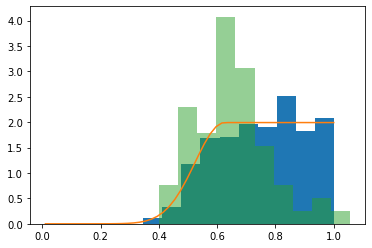

In [36]:

class inefficient_semigaussian_q_sampling():
    def __init__(self,savepath=None,n_x=60000):
        self.n_x      = n_x
        self.q_lnsp   = np.linspace(0, 1, n_x)
        self.savepath = savepath

    def semigauss(self,x,x0,sig):
        if x<x0:
            return np.exp(-(x-x0)**2/(2*sig**2))
        else:
            return 1
    def semigauss_arr(self,x,x0,sig):
        return np.array([self.semigauss(xi,x0,sig) for xi in x])

    def semigauss_norm_arr(self,x,x0,sig):
        y = self.semigauss_arr(x,x0,sig) 
        norm = np.trapz(self.semigauss_arr(self.q_lnsp,x0,sig),self.q_lnsp)
        return y/norm
    # Calculate the cumulative distribution function (CDF)
    def cdf(self,q,q0,sig):
        #return np.trapz([semigauss_norm_arr(xi,x0=x0,sig=sig) for xi in np.linspace(-np.inf, x, 1000)], dx=0.001)
        xx  = np.linspace(0, q, self.n_x)
        smg = self.semigauss_norm_arr(xx,x0=q0,sig=sig)
        return np.trapz(smg,xx)

    # Define the inverse of the CDF
    def inverse_cdf(self,y,q0,sig):
        cdf_comp = [self.cdf(qi,q0,sig) for qi in self.q_lnsp]
        return  [float(self.q_lnsp[np.where(np.abs(cdf_comp-i)==min(np.abs(cdf_comp-i)))]) for i in y]
    
    def get_samples(self,q0,sig,unif_samples=None,savepath=None):
        if hasattr(self,"samples"):
            return self.samples
        if not unif_samples:
            unif_samples = np.random.uniform(0, 1,self.n_x)
        self.samples = self.inverse_cdf(unif_samples,q0=q0,sig=sig)
        if savepath is None:
            savepath = self.savepath
        if savepath is not None:
            with open(savepath,"wb") as f:
                pickle.dump(self.samples,f) 
        return self.samples

smgs = inefficient_semigaussian_q_sampling(n_x=1000)
_= smgs.get_samples(q_ll,sig=sig_min)
plt.hist(smgs.samples,density=1)
plt.plot(x[x>0], semigauss_norm_arr(x[x>0],x0=q_ll,sig=sig_min), label='Original Function')
plt.hist(qm-ql+q_ll,density=1,alpha=.5)

(0.31666666666666665, 0.6833333333333333)

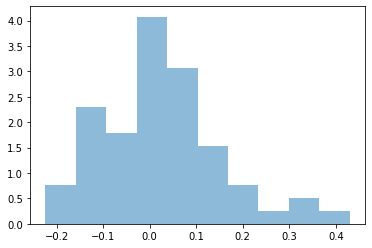

In [37]:
dn,bn,_ = plt.hist(qm-ql,density=1,alpha=.5,bins=10)
bns_cnt = (bn[1:]+bn[:-1])/2
sum(dn[bns_cnt<0])/sum(dn),sum(dn[bns_cnt>=0])/sum(dn)

12.279999999999998


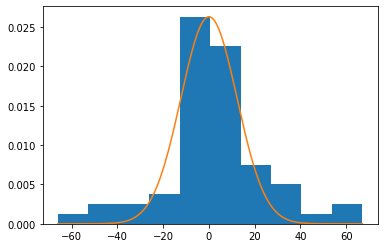

In [38]:
########################################################################################################################################
########################################################################################################################################
########################################################################################################################################
########################################################################################################################################
dns,_,_ = plt.hist(dphi,density=1)
x_phi = np.linspace(min(dphi),max(dphi),1000)
qnt_dphi = quantile(dphi,q=[.16,0.5,.84])
sg_min= qnt_dphi[1]-qnt_dphi[0]
sg_max= qnt_dphi[2]-qnt_dphi[1]
sg_phi = (sg_max+sg_min)/2.
def gauss(x,x0,sig):
    return np.exp(-(x-x0)**2/(2*sig**2))
plt.plot(x_phi,max(dns)*gauss(x_phi,0,sig=sg_phi))

print(sg_phi)
print("not considered bc it is biased by qll>~1")

8.839999999999996


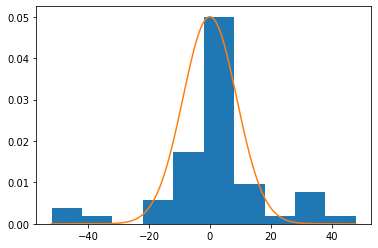

In [39]:
dphi_cut = dphi[ql<.9]

dns,_,_ = plt.hist(dphi_cut,density=1)
x_phi = np.linspace(min(dphi_cut),max(dphi_cut),1000)
qnt_dphi = quantile(dphi_cut,q=[.16,0.5,.84])
sg_min= qnt_dphi[1]-qnt_dphi[0]
sg_max= qnt_dphi[2]-qnt_dphi[1]
sg_phi = (sg_max+sg_min)/2.

plt.plot(x_phi,max(dns)*gauss(x_phi,qnt_dphi[1],sig=sg_phi))

print(sg_phi)
print("This is the result we considered")

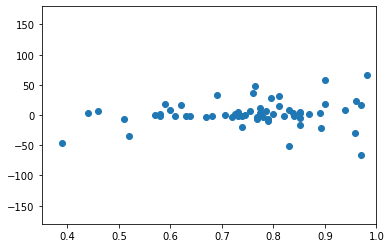

(0.25, 1.0)

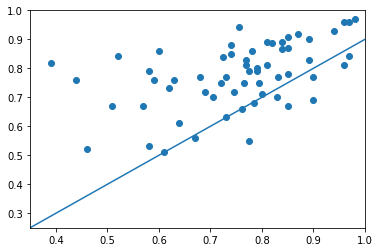

In [40]:
ql,qm,dphi = Read_SLACS('data/SLACS_qphi.tab')
plt.scatter(ql,dphi)
plt.xlim(0.35,1)
plt.ylim(-180,180)
plt.show()
plt.scatter(ql,qm)
plt.plot([0,1],[-.1,.9])
plt.xlim(0.35,1)
plt.ylim(0.25,1)


In [257]:
lens_PEMD_prior.pll

{'q': [0.6250645725046406, 0.05602906545217429],
 'phi': [-8.256763885015516, 1.7520695434383262],
 'x': [0.9653299225796035, 0.1741317822070333],
 'y': [-2.029630395092098, 0.047954918267363304]}

/home/jackquei/Desktop/UNI_Muenchen/Thesis/lenstronomy/SDSSJ1433/general_program/Data/conversion.py:207: UserWarning: NOTE: assumed phi given in degree!
  warnings.warn("NOTE: assumed phi given in degree!")


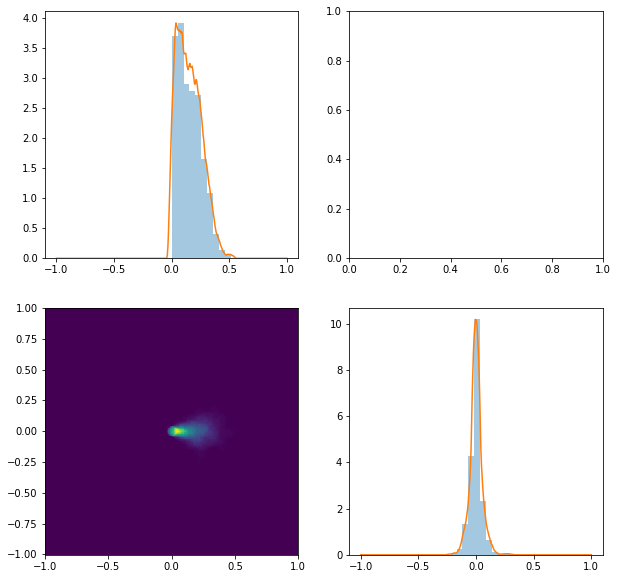

In [45]:
#To decide how to fit the KDE of e1,e2 I did some tests:
def plot_kde_e1e2(prior,bndw):
    kde = KernelDensity(bandwidth=bndw, kernel='tophat').fit(prior)
    pos1 = np.linspace(-1,1,400)
    pos2 = np.linspace(-1,1,400)
    X,Y = np.meshgrid(pos1,pos2)
    dns=[np.exp(kde.score_samples(np.transpose([xi,yi]))) for xi,yi in zip(X,Y)]
    fig,axis = plt.subplots(2,2,figsize=(10,10))
    dh,_,_ = axis[0][0].hist(prior.T[0],alpha=.4,density=1)
    plt_dns = np.array(dns).mean(axis=0)
    axis[0][0].plot(pos1,np.max(dh)*plt_dns/np.max(plt_dns))
    dh,_,_ = axis[1][1].hist(prior.T[1],alpha=.4,density=1)
    plt_dns = np.array(dns).mean(axis=1)
    axis[1][1].plot(pos2,np.max(dh)*plt_dns/np.max(plt_dns))
    axis[1][0].pcolormesh(X,Y, dns)
    plt.show()
    return dns
from Data.conversion import e1e2_from_qphi
_dat0 = inefficient_semigaussian_q_sampling(None,1000)
dat0 = _dat0.get_samples(.6,.1)
dat1 = np.random.normal(0,8.8,1000)
prior      = np.array([dat0,dat1.tolist()]).T
prior_e1e2 = np.transpose(e1e2_from_qphi(*prior.T,deg=True))
_ =plot_kde_e1e2(prior_e1e2,.04)


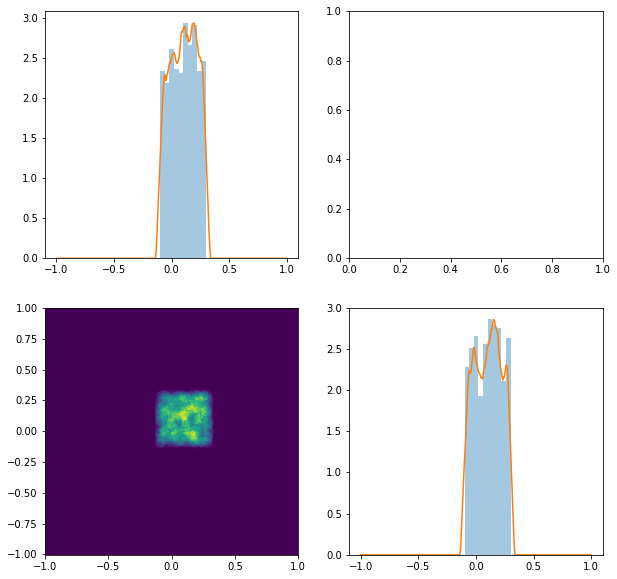

In [47]:
# before
e1=np.random.uniform(-0.1,.3,1000)
e2=np.random.uniform(-0.1,.3,1000)
prior_e1e2 = np.array([e1,e2]).T

_ =plot_kde_e1e2(prior_e1e2,.04)